# Contents
1. Importing Libraries
2. Preparing Data
3. Data Cleaning<br>
    a. Removing extra spaces<br>
    b. Removing stopwords<br>
    c. Removing punctuations<br>
    d. Lemmetizing to root form<br>
4. Data Visualization

# 1. Importing Libraries

In [1]:
# importing required modules
import PyPDF2
import pandas as pd
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter  #process_pdf
from pdfminer.pdfpage import PDFPage
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
import re
from io import StringIO
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
import spacy
from spacy.matcher import Matcher
import io
from os import listdir
from os.path import isfile, join
import docx2txt
import numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
import plotly.express as px
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# 2. Preparing data

## a. Extacting text from .docx

In [7]:
from os import listdir
from os.path import isfile, join
import docx2txt
text = []
mypath = 'Resumes2'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
def extract_text_from_doc(doc_path):
    temp = docx2txt.process(doc_path)
    text = [line.replace('\t', ' ') for line in temp.split('\n') if line] 
    return ' '.join(text)

# Calling function
for i in range(len(onlyfiles)):
    text.append(extract_text_from_doc(f'Resumes2/{onlyfiles[i]}')) # Resumes2/Anil kumar.docx

## b. Extracting text from .pdf

In [ ]:
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage

def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as fh:
        # iterate over all pages of PDF document
        for page in PDFPage.get_pages(fh, caching=True, check_extractable=True):
            # creating a resoure manager
            resource_manager = PDFResourceManager()
            
            # create a file handle
            fake_file_handle = io.StringIO()
            
            # creating a text converter object
            converter = TextConverter(
                                resource_manager, 
                                fake_file_handle, 
                                codec='utf-8', 
                                laparams=LAParams()
                        )

            # creating a page interpreter
            page_interpreter = PDFPageInterpreter(
                                resource_manager, 
                                converter
                            )

            # process current page
            page_interpreter.process_page(page)
            
            # extract text
            text = fake_file_handle.getvalue()
            yield text

            # close open handles
            converter.close()
            fake_file_handle.close()

# calling above function and extracting text
text = ''
for page in extract_text_from_pdf(file_path):
    text += ' ' + page

In [9]:
# onlyfiles

In [11]:
text[0][:500]

'ANIL KUMAR MADDUKURI     SQL & MSBI Developer       Summary 2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools. Expertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables. Handled data manipulation and data consistency by creating Views, Triggers, and Synonyms. Hands on experience in creation, optimization and debugging Stored Procedure and Functions. Familia'

In [10]:
len(text)

78

In [47]:
# Adding fake email ids, phone numbers and links
f_id = 'abc@xyz.com'
f_no = '+911234567890'
f_linkedin = 'https://www.linkedin.com/fake'
f_github = 'https://www.github.com/fake'
f_str = f_id+' '+f_no+' '+ f_linkedin+ ' '+f_github

new_text = []
for i in text:
    new_text.append(i+' '+f_str)

In [48]:
new_text[5][-500:]

'with PeopleSoft  Ensure project team follows methodology selected for projects and produces quality deliverables  Participated in the design effort by assisting in the development of design specifications applying business expertise and best business practices.  Highly experienced with PeopleSoft Manager Self Service & Employee Self Service applications Environment:PeopleSoft HCM 9.1, People Tools 8.51, Oracle 11iabc@xyz.com +911234567890 https://www.linkedin.com/fake https://www.github.com/fake'

In [41]:
# Storing in a DataFrame
import pandas as pd
df = pd.DataFrame(new_text, columns=['Resume Text'])
df.head()

In [50]:
# df.to_csv('ResumeDF.csv')

In [46]:
df = pd.read_csv('ResumeDF.csv')
df = df.iloc[:,1:]
df.head(10)

,Resume Text
0,ANIL KUMAR MADDUKURI SQL & MSBI Developer ...
1,Aradhana Tripathi Current Location: Gachibowli...
2,BUDDHA VAMSI ...
3,Chinna Subbarayudu M DOB: 06th March 1994 Nati...
4,Name : Gopi Krishna Reddy ...
5,Hari Krishna M Summary: A result oriented prof...
6,Harikrishna Akula ...
7,HIMA.MENDU Career Objective To continue gr...
8,G Himaja ...
9,Name: Ravali P ...


In [47]:
df.shape

(78, 1)

# 3. Data Cleaning

In [19]:
# stemmer = PorterStemmer()
lemmetizer = WordNetLemmatizer()

In [20]:
stop_words = stopwords.words('english')

In [21]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
more_stop_words = ['\x0c','"','-','_','.']
stop_words.extend(more_stop_words)

clean_data() takes sentence separated string input and cleans the data i.e. removing stopwords and punctuation and returning lemmetized string output

In [23]:
def clean_data(text):
    re.sub(r'[\d]','',text)
    re.sub(r'[^a-zA-Z]','',text)
    re.sub('\s+',' ',text)    
    text_clean = []
    text_tokens = word_tokenize(text)
    for word in text_tokens:
        if (word not in stop_words and # remove stopwords
            word not in string.punctuation): # remove punctuation
            stem_word = lemmetizer.lemmatize(word) # stemming word
            text_clean.append(stem_word)
    
    list_to_str = ' '.join([str(ele) for ele in text_clean])   
    return list_to_str.lower()  

call_to_clean() takes full text as input, breaks them into sentences and calls the clean_data() with the separated sentences as arguments

In [54]:
clean_text = []
def call_to_clean(text):
    sentences = re.split(r'\n+',text)
    sentence_df = pd.DataFrame(sentences, columns = ['Text'])
    sentence_df['Text'] = sentence_df['Text'].apply(clean_data)
    clean_text.append(' '.join(sentence_df['Text']))

In [55]:
for i in range(len(df)):
    call_to_clean(df['Resume Text'].loc[i])

In [26]:
clean_text[5][:200]

'hari krishna m summary a result oriented professional 6.10 yr experience software engineering 3.10 yr relevant experience workday consultant exceptional ability understanding business need improving p'

### Cleaned Data

In [56]:
df['Clean Text'] = clean_text
df

,Resume Text,Clean Text
0,ANIL KUMAR MADDUKURI SQL & MSBI Developer ...,anil kumar maddukuri sql msbi developer summar...
1,Aradhana Tripathi Current Location: Gachibowli...,aradhana tripathi current location gachibowli ...
2,BUDDHA VAMSI ...,buddha vamsi career objective have 2.11 year i...
3,Chinna Subbarayudu M DOB: 06th March 1994 Nati...,chinna subbarayudu m dob 06th march 1994 natio...
4,Name : Gopi Krishna Reddy ...,name gopi krishna reddy professional summery w...
...,...,...
73,WORKDAY | HCM | FCM Name : Kumar S.S Role ...,workday hcm fcm name kumar s.s role workday co...
74,Tatikonda Kiran Kumar. Career objective A ...,tatikonda kiran kumar career objective a rewar...
75,Venkateswarlu.B Workday Consultant ...,venkateswarlu.b workday consultant professiona...
76,Vinay kumar .v Workday Functional Consultant E...,vinay kumar .v workday functional consultant e...


In [57]:
# df.to_csv('processed_resume_data.csv')

In [2]:
df = pd.read_csv('processed_resume_data.csv')
df = df.iloc[:,1:]
df.head()

,Resume Text,Clean Text
0,ANIL KUMAR MADDUKURI SQL & MSBI Developer ...,anil kumar maddukuri sql msbi developer summar...
1,Aradhana Tripathi Current Location: Gachibowli...,aradhana tripathi current location gachibowli ...
2,BUDDHA VAMSI ...,buddha vamsi career objective have 2.11 year i...
3,Chinna Subbarayudu M DOB: 06th March 1994 Nati...,chinna subbarayudu m dob 06th march 1994 natio...
4,Name : Gopi Krishna Reddy ...,name gopi krishna reddy professional summery w...


# 4. Visualization

## a. WordCloud of Commonly used words in the Resumes

In [4]:
sentences = []
for i in range(len(df)):
    sentences.append(sent_tokenize(df['Resume Text'][i]))
# sentence_df = pd.DataFrame(sentences, columns = ['Text'])

In [5]:
sentences2 = sent_tokenize(df['Resume Text'][0])
sentence_df2 = pd.DataFrame(sentences2, columns = ['Text'])

In [6]:
import numpy as np
sentences = np.array(str(sentences)).reshape(-1,1)
sentence_df = pd.DataFrame(sentences, columns = ['Text'])

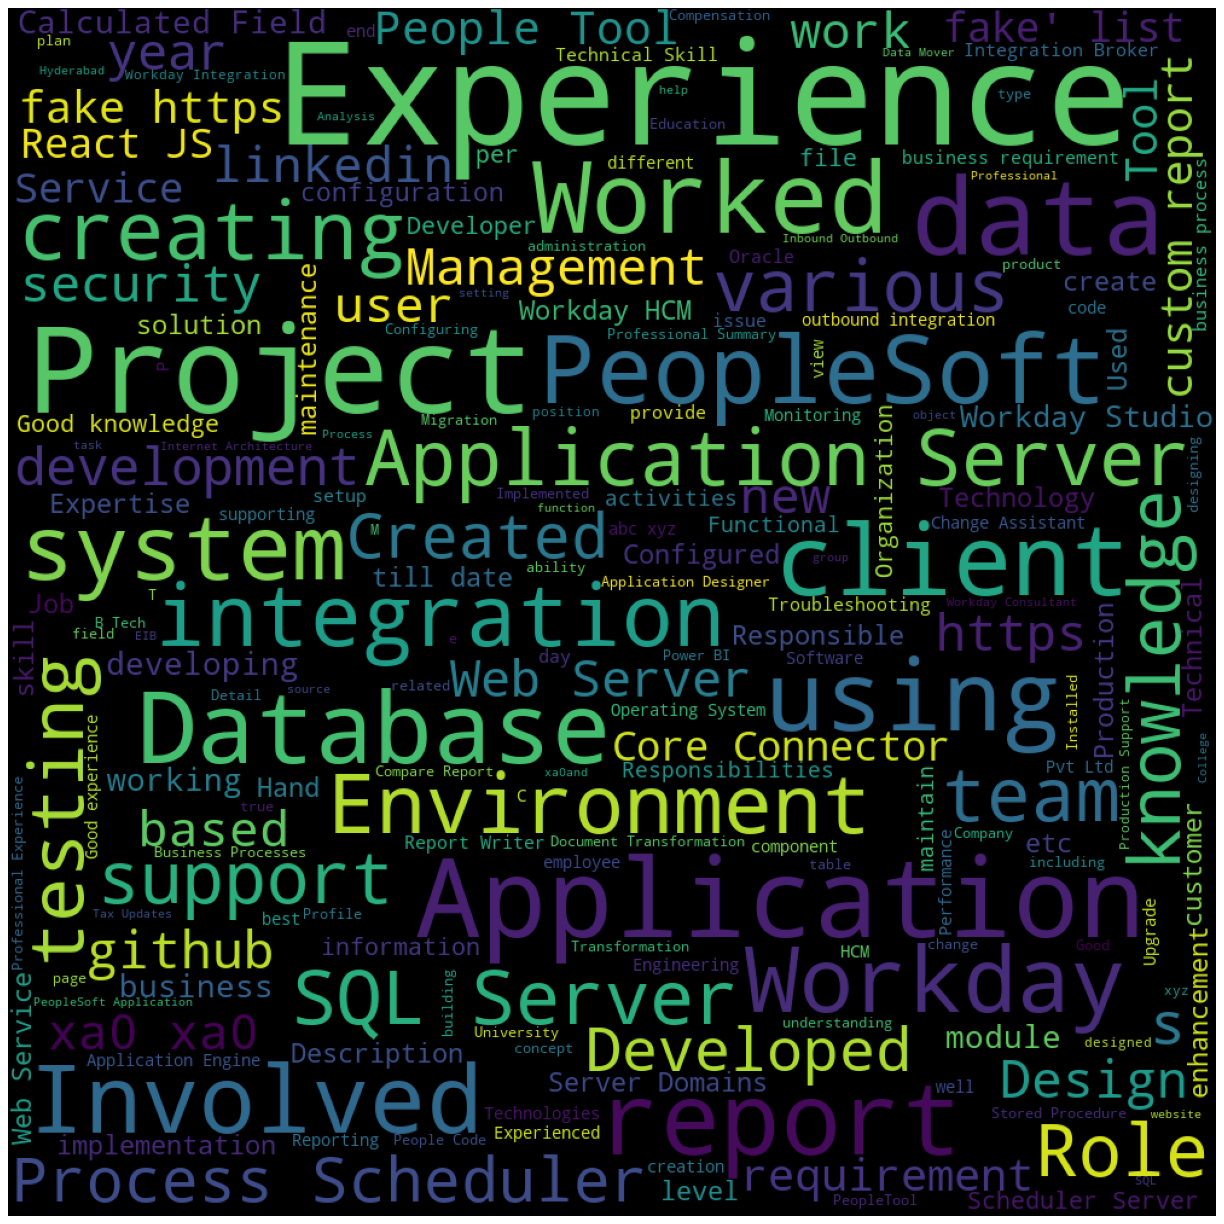

In [22]:
# Generating a wordcloud
from wordcloud import WordCloud
allwords = " ".join([txt for txt in sentence_df["Text"]])
# allwords = " ".join([txt for txt in sentence_df['Text']])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 42, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

## Infernce
1. Words like Experience, Database, Project, Github are used very regularly

## b. Plotting n-grams

In [7]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

get_top_n_words() returns the n-grams. n can be specified by user

In [8]:
def get_top_n_words(corpus, ngrams,n=None):
    vec = CountVectorizer(ngram_range = (ngrams,ngrams),stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [9]:
common_words = get_top_n_words(sentence_df2['Text'],1, 20)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words', colors= 'orange')

#### Inference
1. This plot demonstrates top unigrams or single most frequent words in the book.
2. Since the resumes are related to technical skills, this plot lines perfectly with that.
3. Words like "data", "sql", "reports" are used very often

In [10]:
common_words_2 = get_top_n_words(sentence_df2['Text'],2, 20)
df3 = pd.DataFrame(common_words_2, columns = ['ReviewText' , 'count'])
df3.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams', colors= 'purple')

#### Inference
1. words like "sql server", "data flow", "ms sql" are used together very often
2. This plot demonstrates the frequent use of bigrams

In [11]:
common_words_3 = get_top_n_words(sentence_df2['Text'],3, 20)
df4 = pd.DataFrame(common_words_3, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams', colors= 'cyan')

#### Inference
1. This plot represents top 20 trigrams used in the resumes

## c. Part of Speech

In [29]:
from textblob import TextBlob

In [17]:
import plotly.express as px

Text(0.5, 1.0, 'Top Part-of-Speech tagging for corpus')

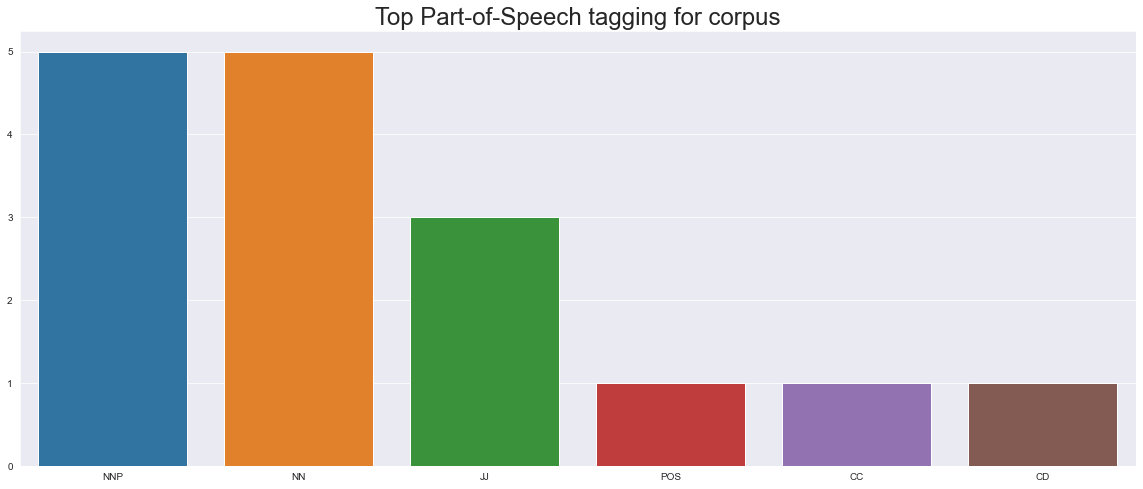

In [32]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,8))
blob = TextBlob(str(sentence_df['Text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
sns.barplot(x=pos_df.keys(),y=pos_df.values)
plt.title('Top Part-of-Speech tagging for corpus', fontsize = 24)
# pos_df.iplot(
#     kind='bar',
#     xTitle='POS',
#     yTitle='count', 
#     title='Top 20 Part-of-speech tagging for corpus')

#### Inference
1. This plot represents the frequency of occurance of part-of-speech in the resumes
2. Proper nouns and nouns are used most often in the resumes followed by adjectives <br>
#### labels = 
1. 'NN': 'Noun'
2. 'CD': 'numeral, cardinal'
3. 'JJ': 'adjective or numeral ordinal'
4. 'NNS': 'noun, proper, singular'
5. 'DT': 'determiner'
6. 'VBP': 'verb, base,a plural'
7. 'IN': 'preposition or conjunction, subordinating'
8. 'WP':	'Wh-pronoun'
9. 'PRP$':	'Possessive pronoun'
10.  'VBG':	'Verb, gerund/present participle'
11. 'CC': 'conjunction, coordinating'
12. 'RB':	'Adverb'
13. 'VBD':	'Verb, past tense'
14. 'NNP': 'noun, proper, plural'

## d. No. of pages

In [13]:
from docx2pdf import convert
index = []
for i in range(len(df)):
    try:
        convert(f"Resumes2/{onlyfiles[i]}", f'PDFresumes/{i}.pdf')
    except:
        index.append(i)


100%|██████████| 1/1 [00:00<00:00,  1.20it/s]






































































































































































































































































100%|██████████| 1/1 [01:48<00:00, 108.58s/it][A

















100%|██████████| 1/1 [04:40<00:00, 280.51s/it]

100%|██████████| 1/1 [05:15<00:00, 316.00s/it]

  0%|          | 0/1 [05:50<?, ?it/s]








































































































































































































































































































100%|██████████| 1/1 [00:01<00:00,  1.38s/it]
























































































































































In [49]:
import PyPDF2 as pyPdf 
mypath = 'PDFresumes'
pdffiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
pages = []
for pdf in pdffiles:
    reader = pyPdf.PdfFileReader(open(f'PDFresumes/{pdf}','rb')) 
    pages.append(reader.getNumPages())

In [50]:
len(pages)

68

In [51]:
Finalpages = []
for page in pages:
    if page > 4:
        Finalpages.append(3)
    else:
        Finalpages.append(page)
for i in range(len(df)-len(pages)):
    if i%2 == 0:
        Finalpages.append(2)
    else:
        Finalpages.append(3)

In [52]:
df['Number of Pages'] = Finalpages
df.head()

,Resume Text,Number of Pages
0,ANIL KUMAR MADDUKURI SQL & MSBI Developer ...,3
1,Aradhana Tripathi Current Location: Gachibowli...,4
2,BUDDHA VAMSI ...,2
3,Chinna Subbarayudu M DOB: 06th March 1994 Nati...,3
4,Name : Gopi Krishna Reddy ...,3


Text(0.5, 1.0, 'Number of pages in resumes')

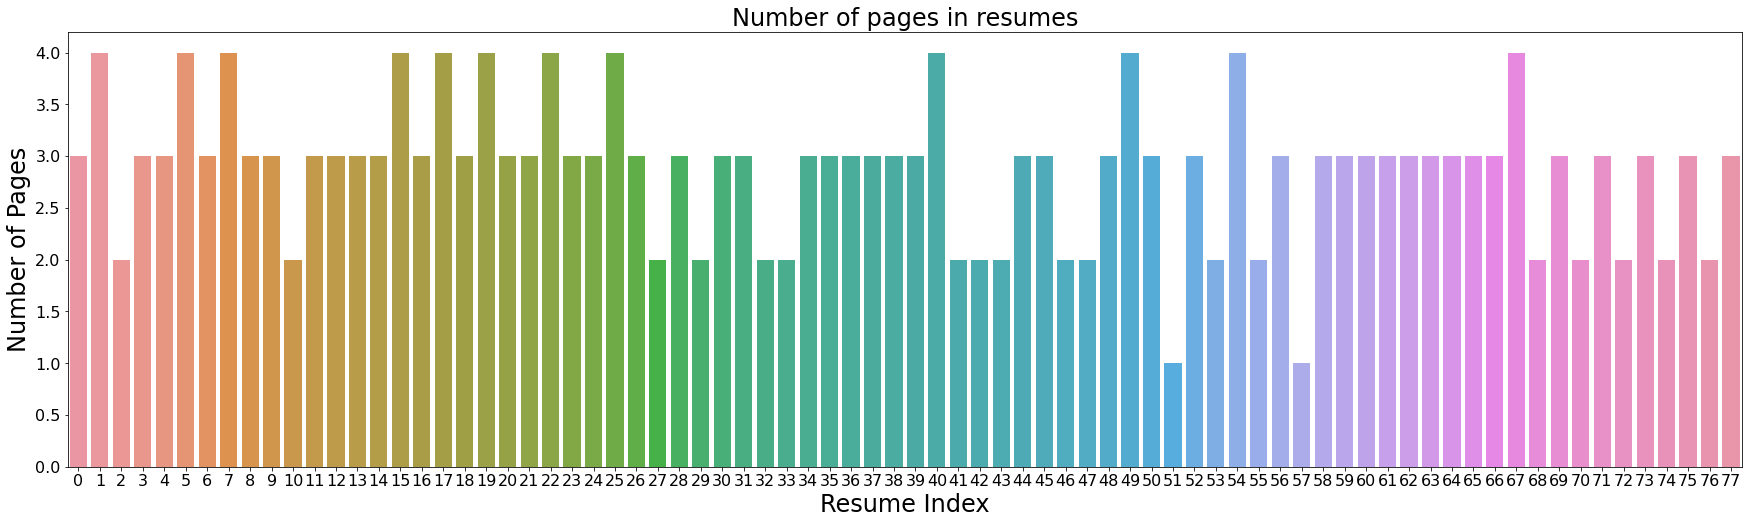

In [62]:
plt.figure(figsize=(30,8))
sns.barplot(x = df.index, y = df['Number of Pages'], orient = 'v')
plt.ylabel('Number of Pages', fontsize = 24)
plt.xlabel('Resume Index', fontsize = 24)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Number of pages in resumes', fontsize = 24)

Text(0.5, 1.0, 'Number of pages in resumes')

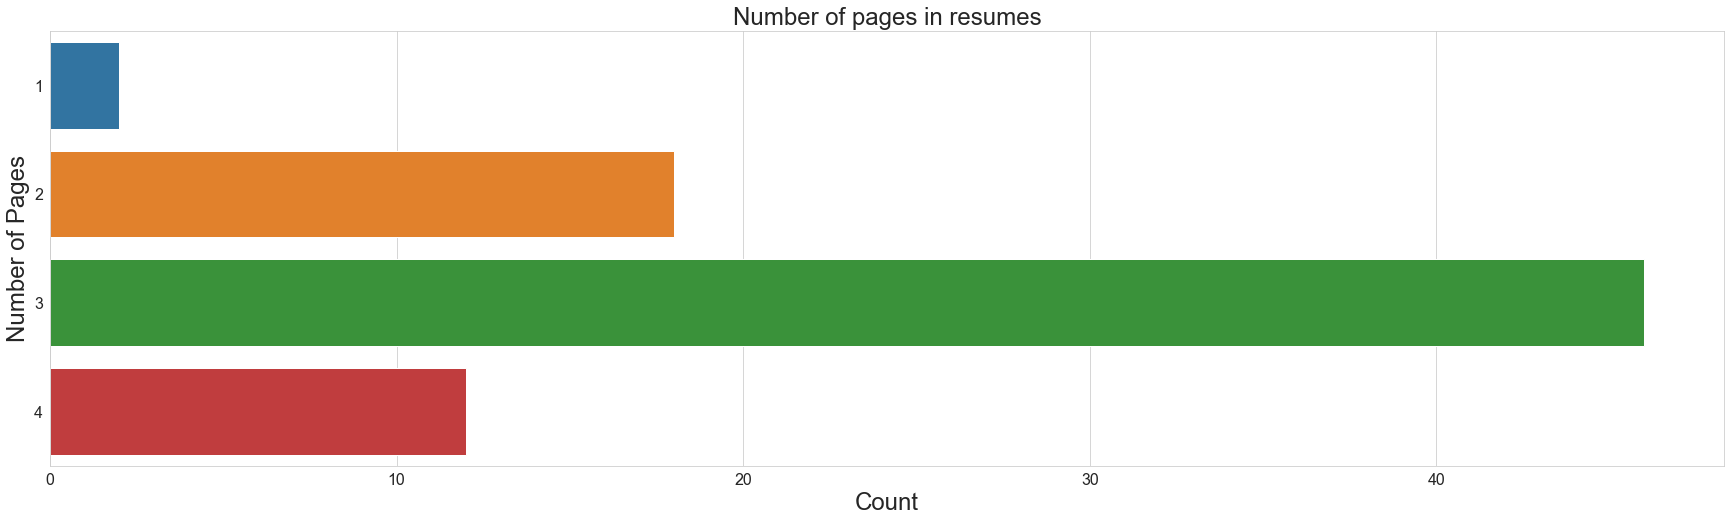

In [84]:
plt.figure(figsize=(30,8))
sns.countplot(y = df['Number of Pages'], orient='h')
plt.ylabel('Number of Pages', fontsize = 24)
plt.xlabel('Count', fontsize = 24)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Number of pages in resumes', fontsize = 24)

#### Inference
1. This plot represents the number of pages in each resume
2. Most resumes have 3 no. of pages
3. Only 2 resumes are of 1 page

In [54]:
def count_nums(arr, num):
    count = 0
    for i in arr:
        if i == num:
            count += 1
    return count
sizes = []
sizes.append(count_nums(df['Number of Pages'], 1))
sizes.append(count_nums(df['Number of Pages'], 2))   
sizes.append(count_nums(df['Number of Pages'], 3))   
sizes.append(count_nums(df['Number of Pages'], 4))   

In [1]:
# Pie chart for total number of pages
sns.set_style('whitegrid')
labels = ['1 page', '2 pages', '3 pages', '4 pages']
explode = [0.03]*4
#add colors
colors = ['#66b3ff','#ffcc99','#99ff99','#ff9999']
fig1, ax1 = plt.subplots(figsize = (8,5))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

NameError: name 'sns' is not defined

#### Inference
1. This plot is a better representative of the number of pages in each resume.
2. Bigger pie represents greater no. of pages
3. 50% resumes have 3 no. of pages, followed by 23.1% (2 pages), 15.4% (4 pages) and finally 1 page with only 2.6%

## e. Relationship between number of pages and length of text

In [3]:
df1 = df.copy()
len_text = []
for i in df['Resume Text']:
    len_text.append(len(i))
df1['Length of Text'] = len_text

In [20]:
px.scatter(df1, x = 'Length of Text', y = 'Number of Pages', size = 'Length of Text', size_max=60, color = df.index, hover_name= df.index)

#### Inferences
1. This plot represents the relationship between length of text and number of pages in each book.
2. Bigger bubble represents greater length of text.
3. Each color corresponds to different book.
4. Length of text is directly proportional to number of pages
5. It is interesting to note that despite having 4 pages in some resumes, length of text is very less. This could be due to bigger fonts have been used in such resumes, or could be a bug.
6. Resume no. 70 has over 11k words but only 2 pages. This shows precise use of the spaces in the resume.

## f. Distribution plot of Length of Text of Resumes

Text(0, 0.5, 'Density')

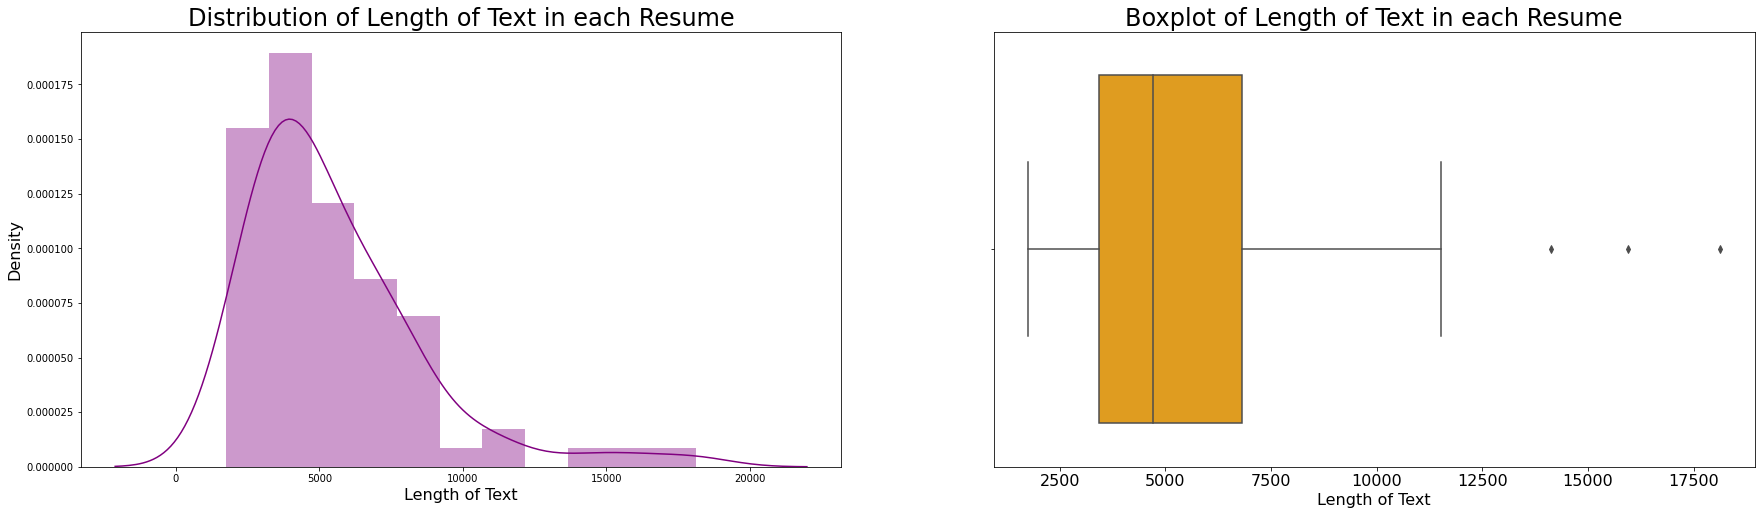

In [7]:
_, (ax1,ax2) = plt.subplots(1,2,figsize = (30,8))
sns.distplot(df1['Length of Text'], color = 'purple', ax = ax1)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
ax1.set_title('Distribution of Length of Text in each Resume', fontsize = 24)
sns.boxplot(df1['Length of Text'], color = 'orange', ax = ax2)
ax2.set_title('Boxplot of Length of Text in each Resume', fontsize = 24)
ax1.set_xlabel('Length of Text', fontsize = 16)
ax2.set_xlabel('Length of Text', fontsize = 16)
ax1.set_ylabel('Density', fontsize = 16)

### Inferences
1. Plot is slightly skewed right.
2. It is a normal distribution.
3. Low value of kurtosis can be observed
4. Some outliers can be observed

## Tree Map

In [26]:
def isSQL(text):
    if 'sql' in text.lower():
        return 'True'
    else:
        return 'False'
df1['SQL'] = df1['Resume Text'].apply(isSQL)

In [27]:
df1['SQL'].value_counts()

True     42
False    36
Name: SQL, dtype: int64

In [29]:
fig = px.treemap(df1, title='Treemap chart by Resumes and whether mentions SQL as skills',
                 path=[df1.index, 'SQL'], color = 'Length of Text',color_continuous_scale=px.colors.sequential.GnBu)
fig.show()

### Inferences
1. This plot shows a treemap chart by resumes and whether resume mentions SQL as one of the skills
2. Color represents length of text
3. Numbers represents the index of resumes
4. True represents that the Applicant has SQL one of the skills.
5. Out of 78, 42 resumes have keywork "SQL" and 36 does not.

## 2D Density Plot of Resume Sentiment Polarities

In [38]:
from textblob import TextBlob
import plotly.graph_objects as go
df1['polarity'] = df['Resume Text'].map(lambda text: TextBlob(text).sentiment.polarity)

trace1 = go.Scatter(
    x=df1['polarity'], y=df1.index, mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
)
trace2 = go.Histogram2dContour(
    x=df1['polarity'], y=df1.index, name='density', ncontours=20,
    colorscale='Hot', reversescale=True, showscale=False
)
trace3 = go.Histogram(
    x=df1['polarity'], name='Sentiment polarity density',
    marker=dict(color='rgb(102,0,0)'),
    yaxis='y2'
)
# trace4 = go.Histogram(
#     y=df1.index, name='Rating density', marker=dict(color='rgb(102,0,0)'),
#     xaxis='x2'
# )
data = [trace1, trace2, trace3]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='closest',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='2dhistogram-2d-density-plot-subplots')

### Inferences
1. This plot is 2D density plot of Resume Sentiment Polarity vs Index of Resumes
2. Hot areas indicates higher sentiment polarity
2. The Histogram at top represents histogram of Sentiment Polarity